In [121]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
path = "/home/manat/projects/CScorer/work/dev/data/data.duckdb"


In [122]:
con = duckdb.connect(path)
df = con.execute("""SELECT* FROM preprocessed.gbif_citizen""" ).df()
df = df.drop(columns= 'geom')
con.close()

In [123]:
#df.head()

In [124]:
df.shape


(86348, 22)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86348 entries, 0 to 86347
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gbifID                         86348 non-null  int64  
 1   occurrenceID                   86348 non-null  object 
 2   publishingOrgKey               86348 non-null  object 
 3   kingdom                        86348 non-null  object 
 4   phylum                         86348 non-null  object 
 5   class                          86348 non-null  object 
 6   order                          86348 non-null  object 
 7   family                         86348 non-null  object 
 8   genus                          86348 non-null  object 
 9   species                        86348 non-null  object 
 10  taxonRank                      86348 non-null  object 
 11  taxonKey                       86348 non-null  int64  
 12  scientificName                 86348 non-null 

In [126]:
df.describe()

,gbifID,taxonKey,day,month,year,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters
count,8.634800e+04,8.634800e+04,86348.000000,86348.000000,86348.000000,86348.000000,86348.000000,86348.000000
mean,4.265822e+09,4.038243e+06,15.793985,6.644659,2022.186547,45.503622,-72.617805,41.356372
std,9.499970e+08,1.771428e+06,8.922012,1.490230,2.495582,0.350535,0.800920,107.469859
min,8.910220e+08,2.650633e+06,1.000000,4.000000,2011.000000,45.014844,-74.503593,0.000000
25%,3.872917e+09,2.888763e+06,8.000000,5.000000,2021.000000,45.323745,-73.325027,3.000000
50%,4.171586e+09,3.112801e+06,16.000000,7.000000,2022.000000,45.434242,-72.688941,8.000000
75%,5.037017e+09,5.338762e+06,24.000000,8.000000,2024.000000,45.558315,-71.966759,22.000000
max,5.868425e+09,1.220746e+07,31.000000,9.000000,2025.000000,46.817932,-70.230866,999.000000


In [127]:
df.describe(include=[object], exclude= [float, int])

,occurrenceID,publishingOrgKey,kingdom,phylum,class,order,family,genus,species,taxonRank,scientificName,eventDate,recordedBy,issue
count,86348,86348,86348,86348,86348,86348,86348,86348,86348,86348,86348,86348,70407,86345
unique,86343,6,1,1,5,46,143,655,1651,1,1676,81495,3606,20
top,https://www.inaturalist.org/observations/53731259,28eb1a3f-1c15-4a95-931a-4af90ecb574d,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Acer,Onoclea sensibilis,SPECIES,Onoclea sensibilis L.,2014-08-23,Vincent Laurie,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
freq,2,70393,86348,86348,63645,11017,10529,2815,1450,86348,1450,16,4127,66416


In [128]:
df.isnull().sum()

gbifID                               0
occurrenceID                         0
publishingOrgKey                     0
kingdom                              0
phylum                               0
class                                0
order                                0
family                               0
genus                                0
species                              0
taxonRank                            0
taxonKey                             0
scientificName                       0
eventDate                            0
day                                  0
month                                0
year                                 0
recordedBy                       15941
decimalLatitude                      0
decimalLongitude                     0
issue                                3
coordinateUncertaintyInMeters        0
dtype: int64

In [129]:
df.duplicated().sum()
#df.drop_duplicates(inplace= True)

0

<Axes: xlabel='coordinateUncertaintyInMeters', ylabel='Count'>

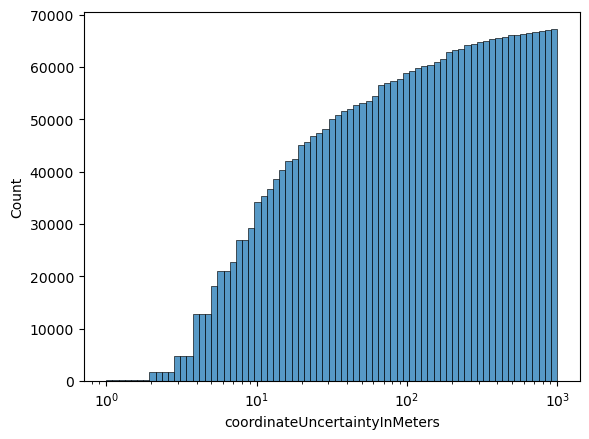

In [130]:
sns.histplot( df, x = 'coordinateUncertaintyInMeters', log_scale= True, cumulative=True)

In [131]:
q3 = df['coordinateUncertaintyInMeters'].quantile(0.90)
print(q3)

100.0


<Axes: xlabel='month', ylabel='Count'>

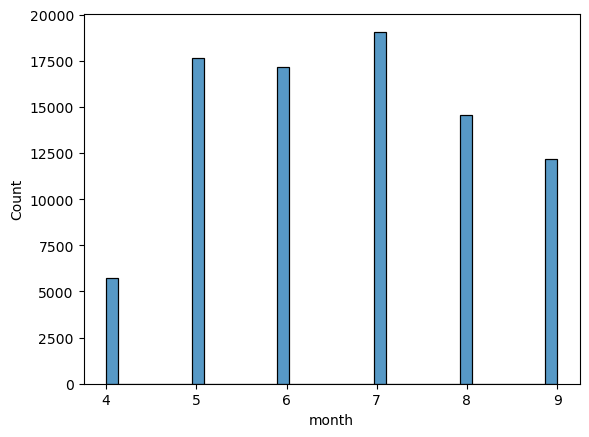

In [132]:
sns.histplot( df, x = 'month')